Support Vector Regression (SVR)

In [1]:
# Es recomendable ajustar los datos cuando algunos son mucho más grandes que otros, etc.

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/rama_2023_05.csv')
data

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789
...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818


In [9]:
from sklearn.preprocessing import StandardScaler    # Estandariza los datos entre 0 y 1
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [10]:
X = data[['NO', 'PM25']]
y = data['PM10']    # Lo que se quiere predecir (variable objetivo)

In [15]:
split_index = int(len(data) * 0.8)
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
svr_model = SVR(kernel = 'rbf', C = 1.0, epsilon = 0.1)
svr_model.fit(X_train_scaled, y_train)

SVR()

In [19]:
y_test_pred = svr_model.predict(X_test_scaled)
y_test_pred

array([27.40761917, 35.77793633, 32.17429679, 22.82518235, 30.48430695,
       41.11594173, 37.58428436, 28.09167337, 37.97537459, 23.91286787,
       19.20328149, 18.82442937, 21.19763671, 27.36263668, 25.53968469,
       33.993949  , 19.66838841, 33.65115323, 31.98673445, 34.8672092 ,
       40.043503  , 33.25375081, 21.78407896, 20.94532471, 28.91295932,
       33.35456443, 49.15430622, 20.72209997, 20.36709571, 38.68956257,
       21.27436979, 42.64025845, 38.3963939 , 28.35836922, 47.08577752,
       52.62871896, 43.30089722, 36.27219649, 36.45515416, 30.38567287,
       42.74125803, 42.05070895, 38.25157147, 33.90690986, 25.88341386,
       36.67566441, 47.40008916, 48.39883073, 37.43617287, 28.27971234,
       26.49897309, 27.27665678, 25.41516366, 40.04589406, 42.03444668,
       41.80978603, 22.10144211, 27.46457306, 32.31344689, 28.35958602,
       22.32938689, 36.24948179, 51.15879227, 34.23562239, 50.93611281,
       50.6372418 , 46.17460214, 46.46979322, 40.9436209 , 36.06

In [21]:
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [23]:
print(test_mse)
print(test_r2)

63.310573032474885
0.6896354071907487


<function matplotlib.pyplot.show(close=None, block=None)>

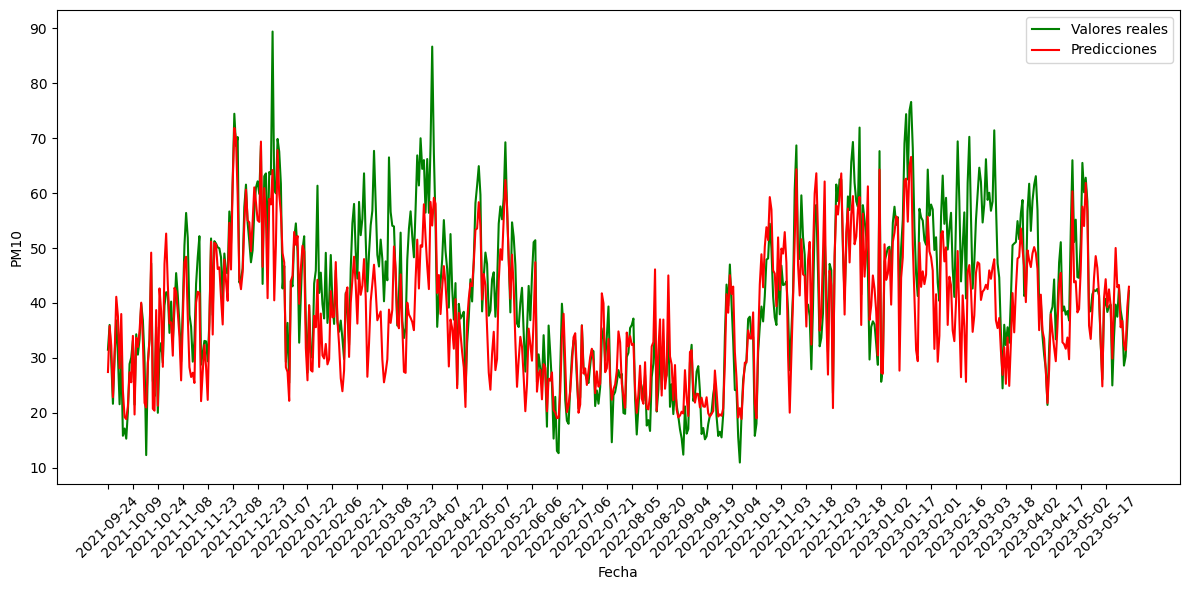

In [31]:
plt.figure(figsize=(12,6))
plt.plot(data.iloc[split_index:]['fecha'], y_test, label = 'Valores reales', color = 'green')
plt.plot(data.iloc[split_index:]['fecha'], y_test_pred, label = 'Predicciones', color = 'red')
plt.xlabel('Fecha')
plt.ylabel('PM10')
plt.legend()

plt.xticks(data.iloc[split_index:]['fecha'][::15], rotation = 45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

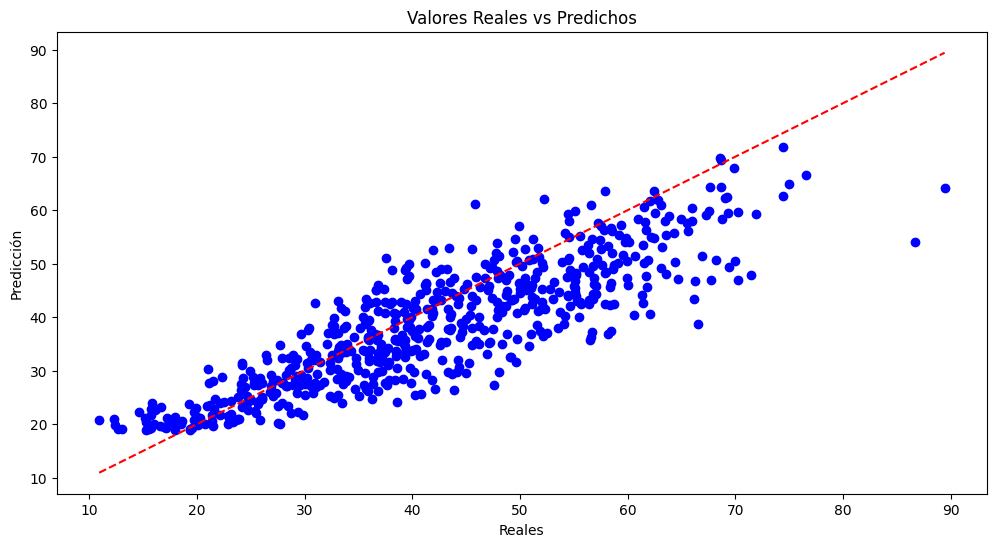

In [32]:
plt.figure(figsize = (12,6))    # Gráfica de dispersión, X = reales, Y = prediccion
plt.scatter(y_test, y_test_pred, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label = 'Línea ideal')    # Se dibuja la línea identidad y = x
plt.title('Valores Reales vs Predichos')
plt.xlabel('Reales')
plt.ylabel('Predicción')
plt.show()

Introduciendo varialbes temporales

In [34]:
data['fecha'] = pd.to_datetime(data['fecha'])   # Se indica a python que la columna fecha sean fechas

In [41]:
data['mes'] = data['fecha'].dt.month
data['dia'] = data['fecha'].dt.day
data['dia_de_semana'] = data['fecha'].dt.dayofweek
data['fin_de_semana'] = (data['fecha'].dt.dayofweek >= 5).astype(int)   # ¿Es sábado o domingo? -> True, else -> False
data.head(25)

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0
5,2015-01-06,0.748952,27.977346,23.242718,51.213592,12.902256,40.321608,21.113712,4.024024,1,6,1,0
6,2015-01-07,0.443254,11.297114,16.259762,27.594228,17.055130,30.054598,10.737643,2.192547,1,7,2,0
7,2015-01-08,0.533528,10.527586,21.625862,32.155172,19.150555,33.313953,14.501946,1.962233,1,8,3,0
8,2015-01-09,1.094574,41.795181,32.526678,74.283993,19.482813,55.188679,29.085106,2.781046,1,9,4,0
9,2015-01-10,0.770722,23.455717,27.468599,50.919485,22.689552,39.798507,24.071895,2.559006,1,10,5,1


Selección de características: Se buscan las variables más relevantes para predecir el objetivo

Se puede usar SelectKBest

In [43]:
X = data.drop(columns = ['fecha', 'PM10'])    # Se eliminan 'fecha' y la que se quiere predecir. Se quita fecha porque se busca que la función diga cuales son las variables más relevantes
X

,CO,NO,NO2,NOX,O3,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana
0,1.050696,22.765528,24.225155,46.987578,23.175150,78.953405,11.554723,1,1,3,0
1,0.807585,32.249608,21.554160,53.800628,17.268366,15.449438,1.895052,1,2,4,0
2,0.640755,21.686916,19.394081,41.071651,15.486486,12.915129,1.436937,1,3,5,1
3,0.726940,24.606272,19.560976,44.165505,17.329032,16.838284,1.809061,1,4,6,1
4,0.530815,11.443182,20.990260,32.439935,14.470588,12.667774,8.315789,1,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3068,0.256722,3.750583,17.284351,21.629371,41.580645,21.170139,2.735683,5,27,5,1
3069,0.286826,3.458886,16.349241,20.230769,36.913761,18.454861,2.331658,5,28,6,1
3070,0.482077,11.448113,24.521154,36.436321,29.697068,16.692857,1.071588,5,29,0,0
3071,0.441455,13.893519,22.615530,37.224537,36.185971,20.888525,1.181818,5,30,1,0


In [44]:
y = data['PM10']

In [47]:
selector = SelectKBest(score_func = f_regression, k = 8)      # k: número de características (las 8 mejores , en este caso)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features

Index(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM25', 'SO2', 'mes'], dtype='object')

In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf_model = RandomForestRegressor(random_state = 42)

In [50]:
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

In [59]:
importancia_df = pd.DataFrame({'Característica': X.columns, 'Importancia': rf_model.feature_importances_}).sort_values(by = 'Importancia')
importancia_df    # Que tanto % de la varianza es explicada por cada característica

,Característica,Importancia
10,fin_de_semana,0.001179
9,dia_de_semana,0.007141
8,dia,0.011908
0,CO,0.014492
6,SO2,0.016471
1,NO,0.025293
3,NOX,0.027143
4,O3,0.029672
2,NO2,0.030219
7,mes,0.079192


Incluir variables meteorilógicas
'https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv'



In [60]:
redmet = pd.read_csv('https://raw.githubusercontent.com/jamc88/Analisis-datos-atmosfericos/refs/heads/main/datos/redmet_2023_05.csv')
redmet

,fecha,RH,TMP,WDR,WSP
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...
3068,2023-05-27,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,50.145719,18.684699,184.998255,1.978709


In [63]:
redmet['fecha'] = pd.to_datetime(redmet['fecha'])
data['fecha'] = pd.to_datetime(data['fecha'])
union = pd.merge(data, redmet, on = 'fecha', how = 'inner')
union

,fecha,CO,NO,NO2,NOX,O3,PM10,PM25,SO2,mes,dia,dia_de_semana,fin_de_semana,RH,TMP,WDR,WSP
0,2015-01-01,1.050696,22.765528,24.225155,46.987578,23.175150,105.573684,78.953405,11.554723,1,1,3,0,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,0.807585,32.249608,21.554160,53.800628,17.268366,36.687845,15.449438,1.895052,1,2,4,0,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,0.640755,21.686916,19.394081,41.071651,15.486486,29.269022,12.915129,1.436937,1,3,5,1,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,0.726940,24.606272,19.560976,44.165505,17.329032,39.961538,16.838284,1.809061,1,4,6,1,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,0.530815,11.443182,20.990260,32.439935,14.470588,31.855643,12.667774,8.315789,1,5,0,0,70.271845,9.070227,266.889764,2.963517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,2023-05-27,0.256722,3.750583,17.284351,21.629371,41.580645,36.774011,21.170139,2.735683,5,27,5,1,51.899130,19.453565,190.198664,2.187646
3069,2023-05-28,0.286826,3.458886,16.349241,20.230769,36.913761,28.580000,18.454861,2.331658,5,28,6,1,59.949565,17.375826,183.542571,2.092154
3070,2023-05-29,0.482077,11.448113,24.521154,36.436321,29.697068,30.241486,16.692857,1.071588,5,29,0,0,58.837743,17.039153,169.527919,1.952284
3071,2023-05-30,0.441455,13.893519,22.615530,37.224537,36.185971,35.859532,20.888525,1.181818,5,30,1,0,50.145719,18.684699,184.998255,1.978709
